<a href="https://colab.research.google.com/github/OMRAKESHMITTAL/Computer-Analystics/blob/main/CA_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MOUNTING GOOGLE DRIVE TO COLAB FOR CSV FILE READING
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   Angle_of_Attack       1503 non-null   float64
 2   Chord_Length          1503 non-null   float64
 3   Free_stream_velocity  1503 non-null   float64
 4   Displacement          1503 non-null   float64
 5   Sound_pressure_level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None
Frequency               0
Angle_of_Attack         0
Chord_Length            0
Free_stream_velocity    0
Displacement            0
Sound_pressure_level    0
dtype: int64
                      Frequency  Angle_of_Attack  Chord_Length  \
Frequency              1.000000        -0.272765     -0.003661   
Angle_of_Attack       -0.272765         1.000000     -0.504868   
Chord_Length          -0.003661        -0.504868      1.000000 

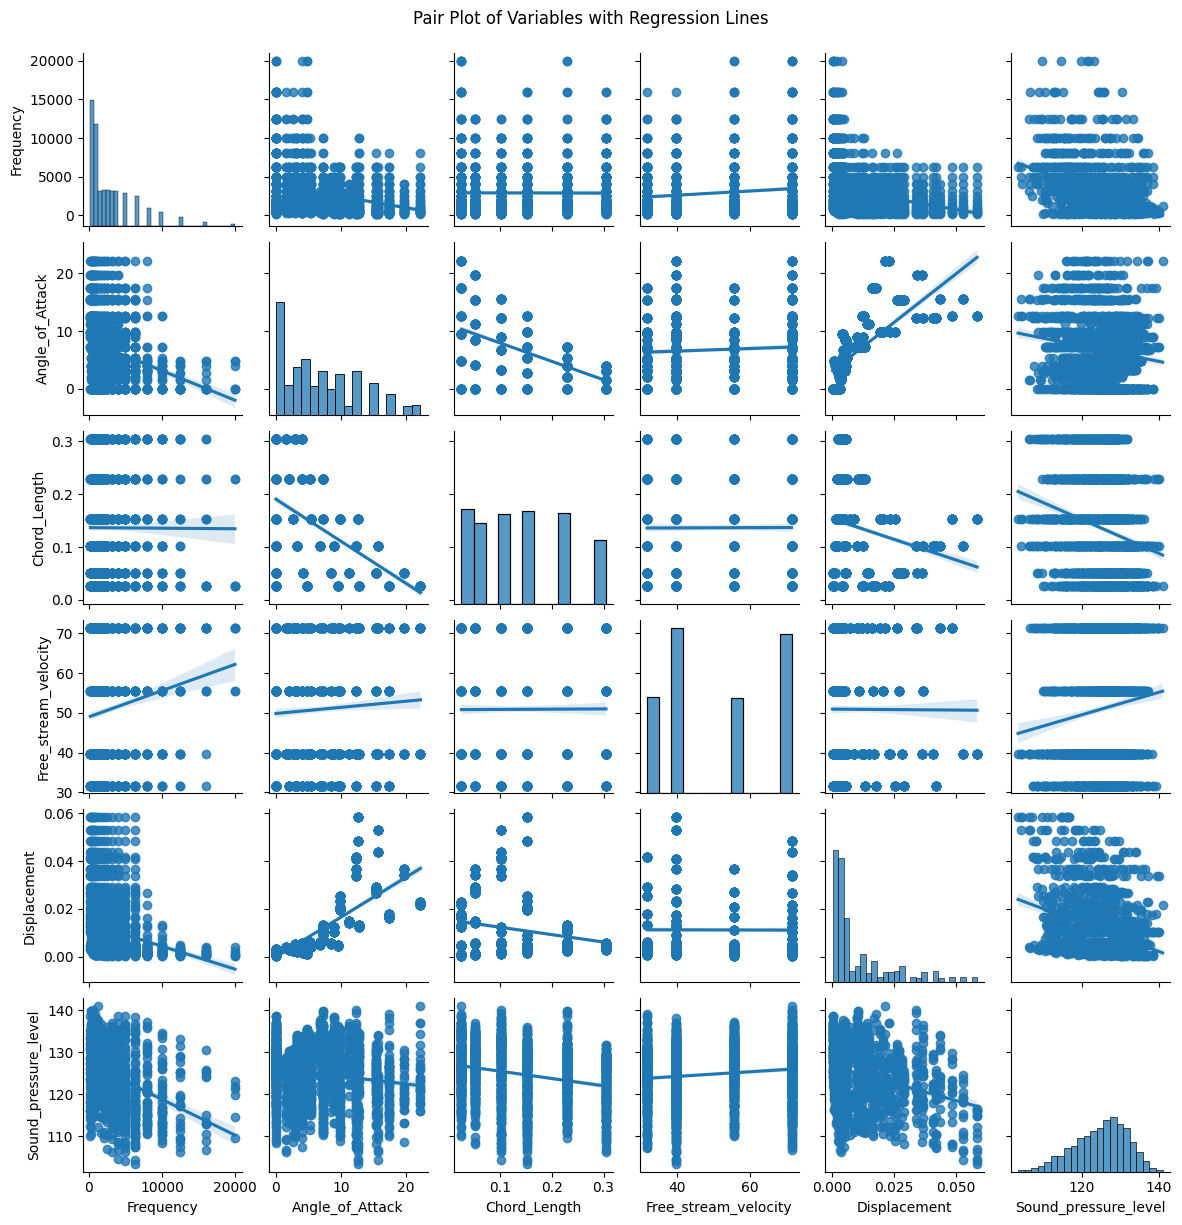

R-squared: 0.5582979754896895
Adjusted R-squared: 0.5013716488971148
F-statistics: 242.5215055435907, p-value: 6.080414968968652e-179
MSE: 22.128643318249228
RMSE: 4.704109194975094
MAE: 3.6724145641747024


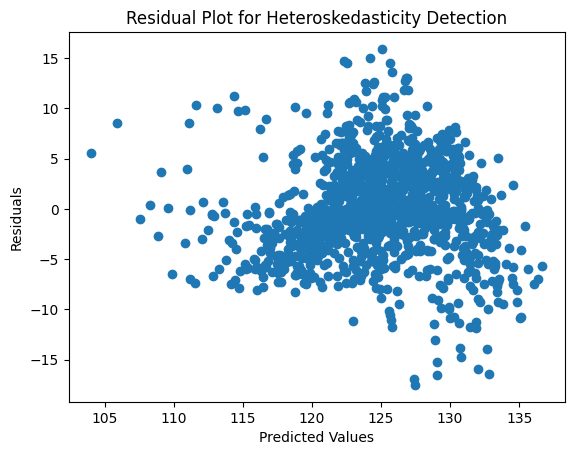

In [ ]:
#loding data from google drive
mydata = pd.read_csv("/content/drive/MyDrive/airfoil_self_noise.csv")
mydata #printing dataset
print(mydata.info())
# Check missing values
missing_values = mydata.isna().sum()
print(missing_values)
# Checking correlation matrix
correlation_matrix = mydata.corr()
print(correlation_matrix)
# Define your independent variables (features)
X = mydata.drop(columns=['Sound_pressure_level'])
# Add a constant term to the independent variables matrix
X = sm.add_constant(X)
X
# Selecting relevant columns
selected_columns = ['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Free_stream_velocity', 'Displacement', 'Sound_pressure_level']
selected_data = mydata[selected_columns]

# Creating a pair plot
sns.pairplot(selected_data, kind='reg', height=2)
plt.suptitle('Pair Plot of Variables with Regression Lines', y=1.02)
plt.show()

# Define the dependent variable
y = mydata['Sound_pressure_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the training data
model = sm.OLS(y_train, X_train).fit()

# Get the predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared on testing data
r_squared = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
adj_r_squared = model.rsquared_adj

# Calculate F-statistics and p-value
f_statistic = model.fvalue
p_value = model.f_pvalue

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")
print(f"F-statistics: {f_statistic}, p-value: {p_value}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

residuals = model.resid
plt.scatter(model.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroskedasticity Detection')
plt.show()
